In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

2024-01-16 13:41:10.221699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras import layers

## tfds.load

Loads the named dataset into a tf.data.Dataset

tfds.load(

    name: str,
    *,
    split: Optional[Tree[splits_lib.SplitArg]] = None,
    data_dir: Union[None, str, os.PathLike] = None,
    batch_size: Optional[int] = None,
    shuffle_files: bool = False,
    download: bool = True,
    as_supervised: bool = False,
    decoders: Optional[TreeDict[decode.partial_decode.DecoderArg]] = None,
    read_config: Optional[read_config_lib.ReadConfig] = None,
    with_info: bool = False,
    builder_kwargs: Optional[Dict[str, Any]] = None,
    download_and_prepare_kwargs: Optional[Dict[str, Any]] = None,
    as_dataset_kwargs: Optional[Dict[str, Any]] = None,
    try_gcs: bool = False)

## with_info

bool, 

if True, tfds.load will return the tuple (tf.data.Dataset, tfds.core.DatasetInfo), the latter containing the info associated with the builder.

Returns the tfds.core.DatasetInfo containing dataset metadata   

## as_supervised

bool, 

if True, the returned tf.data.Dataset will have a 2-tuple structure (input, label) according to builder.info.supervised_keys. 

If False, the default, the returned tf.data.Dataset will have a dictionary with all the features.

https://velog.io/@jujemu/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%8F%84%EB%8C%80%EC%B2%B4-%EB%AD%90%EC%95%BC

In [96]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [48]:
print(metadata)

#Image(shape=(None, None, 3) : 'None' means that the size of the image is not uniform

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/Users/joohyunyoon/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [49]:
tt=train_ds.take(1)
for img, label in tt:
    print(img.shape, label)

(333, 500, 3) tf.Tensor(2, shape=(), dtype=int64)


2024-01-16 18:18:14.865355: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## element_spec

to check the specification of an element of the created dataset. 

In [50]:
train_ds.element_spec

(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

2024-01-16 18:18:15.013074: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,2 (tulips)
1,,3 (sunflowers)

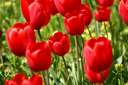
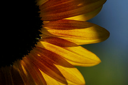

In [51]:
tfds.as_dataframe(train_ds.take(2),metadata)

2024-01-16 18:18:17.154855: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


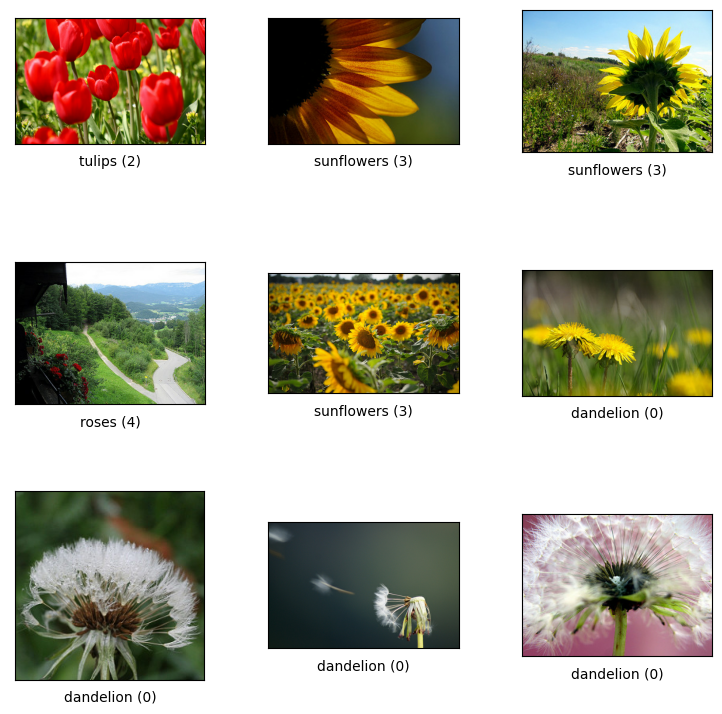

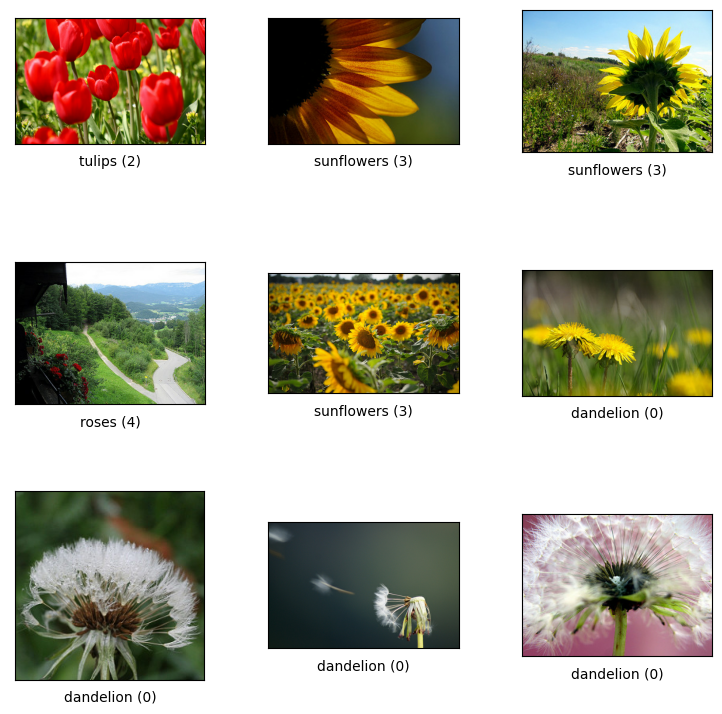

In [52]:
tfds.show_examples(train_ds, metadata)

In [97]:
num_classes=metadata.features['label'].num_classes
num_classes

5

## int2str
Conversion integer => class name string.

In [54]:
get_label_name=metadata.features['label'].int2str

In [55]:
get_label_name

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=int64, num_classes=5)>

2024-01-16 19:03:13.119188: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


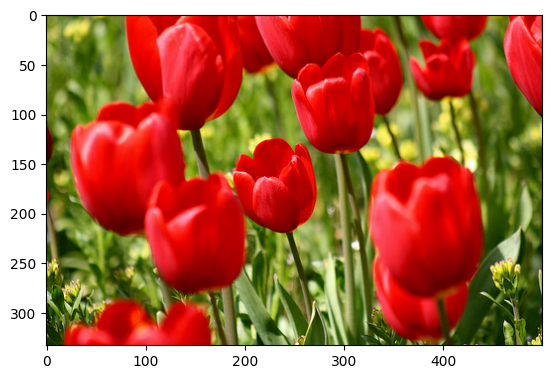

In [98]:
image, label=next(iter(train_ds))
_=plt.imshow(image)

In [57]:
IMG_SIZE=180

resize_and_rescale=tf.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),
                    layers.Rescaling(1./255)])

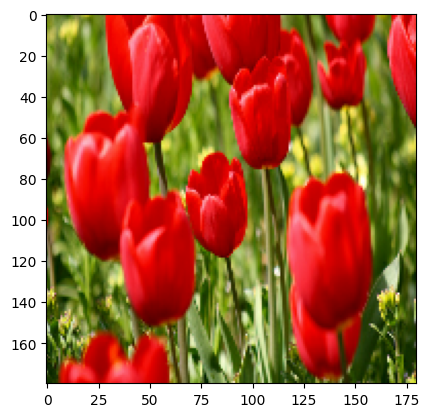

In [58]:
result=resize_and_rescale(image)
_=plt.imshow(result)

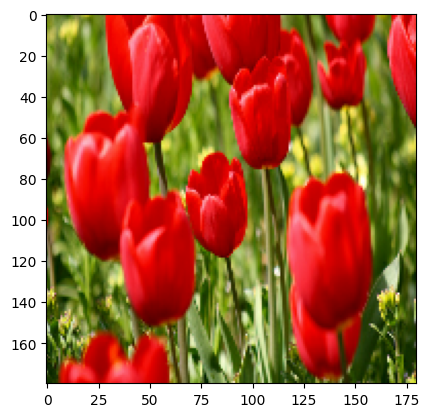

In [59]:
result1=resize_and_rescale(img,training=True)
_=plt.imshow(result1)

In [60]:
# result==result1
#true

In [61]:
type(result)

tensorflow.python.framework.ops.EagerTensor

In [62]:
print(result.numpy().min(),result.numpy().max())

0.0 1.0


## tf.keras.layers.RandomFlip

A preprocessing layer which randomly flips images during training.

tf.keras.layers.RandomFlip(

    mode=HORIZONTAL_AND_VERTICAL, seed=None, **kwargs
)

## tf.keras.layers.RandomRotation

A preprocessing layer which randomly rotates images during training.

tf.keras.layers.RandomRotation(

    factor,
    fill_mode='reflect',
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,
    **kwargs
)

In [63]:
data_augmentation=tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical'),
                                      layers.RandomRotation(0.2)])
data_augmentation

## tf.expand_dims

Returns a tensor with a length 1 axis inserted at index axis.
Given a tensor input, this operation inserts a dimension of length 1 at the dimension index axis of input's shape. 

tf.expand_dims(

    input, axis, name=None
)

In [107]:
img1=tf.expand_dims(image,0)
img1.shape

TensorShape([1, 333, 500, 3])

In [108]:
img2=tf.expand_dims(image,1)
img2.shape

TensorShape([333, 1, 500, 3])

In [109]:
image=tf.cast(tf.expand_dims(image,0), tf.float32)
image[0]

<tf.Tensor: shape=(333, 500, 3), dtype=float32, numpy=
array([[[ 93., 122.,  30.],
        [ 90., 118.,  31.],
        [ 88., 118.,  28.],
        ...,
        [247.,  77.,  78.],
        [253.,  87.,  87.],
        [255.,  76.,  75.]],

       [[ 98., 125.,  30.],
        [ 95., 124.,  32.],
        [ 96., 125.,  32.],
        ...,
        [247.,  81.,  83.],
        [250.,  86.,  84.],
        [252.,  71.,  64.]],

       [[ 98., 126.,  26.],
        [101., 128.,  31.],
        [106., 132.,  33.],
        ...,
        [254.,  81.,  85.],
        [254.,  79.,  76.],
        [252.,  55.,  47.]],

       ...,

       [[ 35.,  51.,   6.],
        [ 21.,  49.,   0.],
        [ 30.,  57.,   6.],
        ...,
        [224., 239.,  78.],
        [192., 208.,  50.],
        [ 88.,  54.,  53.]],

       [[ 65.,  73.,  32.],
        [ 20.,  46.,   0.],
        [ 22.,  48.,   0.],
        ...,
        [230., 236.,  74.],
        [230., 246.,  62.],
        [ 88.,  57.,  36.]],

       [[ 95.,  9

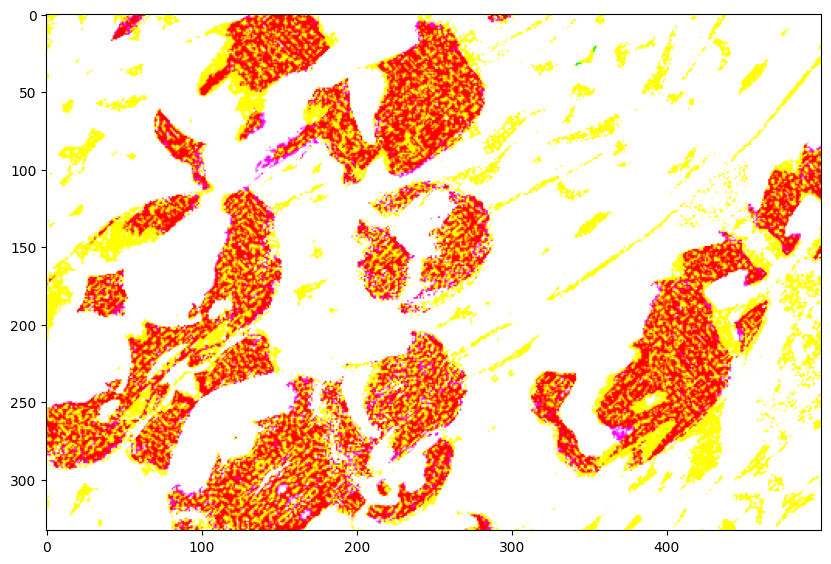

In [66]:
plt.figure(figsize=(10,10))
for i in range(3):
    aumented_img=data_augmentation(image)
#     ax = plt.subplot(3, 3, i + 1)
    plt.imshow(aumented_img[0])
#     plt.axis("off")

## tf.keras.layers.Conv2D

tf.keras.layers.Conv2D(

    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

## padding

one of "valid" or "same" (case-insensitive). 

"valid" means no padding. 

"same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

In [67]:
model=tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D()
])

## map

map(map_func, num_parallel_calls=None, deterministic=None, name=None)

Maps map_func across the elements of this dataset.

This transformation applies map_func to each element of this dataset, and returns a new dataset containing the transformed elements, in the same order as they appeared in the input. map_func can be used to change both the values and the structure of a dataset's elements. 

In [68]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

## AUTOTUNE 

it tells TensorFlow to build our pipeline and then optimize such that our CPU can budget time for each of the parameters in the pipeline.

In [69]:
batch_size=32
AUTOTUNE=tf.data.AUTOTUNE

## num_parallel_calls

A tf.int64 scalar tf.Tensor, representing the number of batches to compute asynchronously in parallel. If not specified, batches will be computed sequentially. 

If the value tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available resources.

## shuffle  

it is set to True, implying that data will be shuffled.

## batch

batch(

    batch_size,
    drop_remainder=False,
    num_parallel_calls=None,
    deterministic=None,
    name=None
) -> 'DatasetV2'

## prefetch

Parallelize producers (the work of generating data) and consumers (the work of consuming data, such as learning and inference). (The producer brings the data at the same time rather than waiting for it when the consumer is working.)

While the model executes the s-step training, the input pipeline reads the data in the s+1 step.
This can reduce the maximum step time for training and the time for extracting the data

Like the map, the prefetch function can also be transmitted as a factor of tf.data.AUTOTUNE to return to multi-thread.

prefetch(

    buffer_size, name=None
) -> 'DatasetV2'

## buffer_size

Each time you mix the data, take out the size of the buffer and mix it.

In [70]:
def prepare(ds, shuffle=False, augment=False):
    ds=ds.map(lambda x,y:(resize_and_rescale(x),y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds=ds.shuffle(100)
    ds=ds.batch(batch_size)
    
    if augment:
        ds=ds.map(lambda x,y:(data_augmentation(x, training=True),y),num_parallel_calls=AUTOTUNE)
        
    return ds.prefetch(buffer_size=AUTOTUNE)

In [71]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [72]:
model=tf.keras.Sequential([
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [73]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

fit(

    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

In [74]:
epochs=2
history=model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/2
92/92 [==============================] - 35s 363ms/step - loss: 1.2733 - accuracy: 0.4475 - val_loss: 1.1247 - val_accuracy: 0.5450
Epoch 2/2
92/92 [==============================] - 33s 359ms/step - loss: 1.0603 - accuracy: 0.5627 - val_loss: 1.0730 - val_accuracy: 0.5913


## evaluate

Returns the loss value & metrics values for the model in test mode.

evaluate(

    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)

In [75]:
model.evaluate(test_ds)

12/12 [==============================] - 1s 98ms/step - loss: 1.0201 - accuracy: 0.5777


[1.0201172828674316, 0.5776566863059998]

## tf.random.uniform

Outputs random values from a uniform distribution.

tf.random.uniform(

    shape,
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)

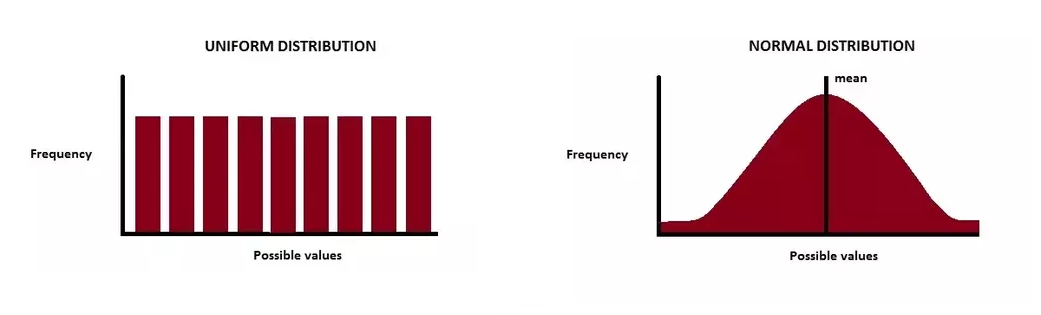

In [76]:
def random_invert_img(x, p=0.5):
    if tf.random.uniform([])<p:
        x=255-x
    else:
        x
    return x

In [77]:
def random_invert(factor=0.5):
    return layers.Lambda(lambda x:random_invert_img(x, factor))

random_invert=random_invert()

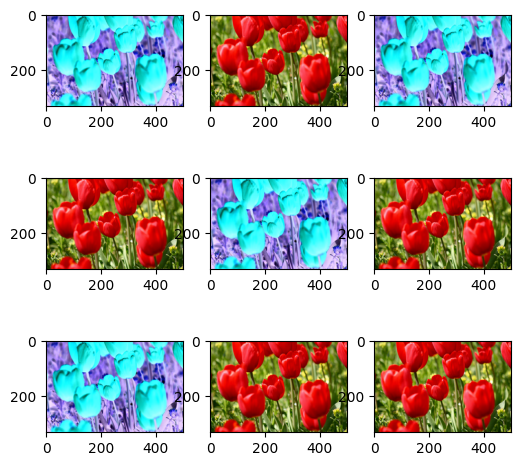

In [78]:
plt.figure(figsize=(6, 6))
for i in range(9):
    augmented_image = random_invert(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
#     plt.axis("off")

## subclassing

One of the central abstractions in Keras is the Layer class. A layer encapsulates both a state (the layer's "weights") and a transformation from inputs to outputs (a "call", the layer's forward pass).

class Linear(keras.layers.Layer):

    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(
            shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [84]:
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return random_invert_img(x)

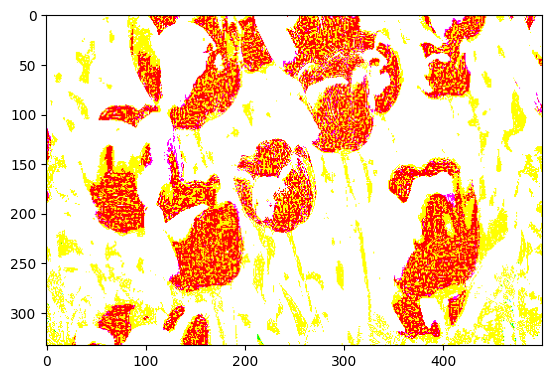

In [86]:
_=plt.imshow(RandomInvert()(image)[0])

In [100]:
def visualize(original, augmented):
    fig=plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(original)
    
    plt.subplot(1,2,2)
    plt.imshow(augmented)

## tf.image.flip_left_right

Flip an image horizontally (left to right).

tf.image.flip_left_right(
    image
)

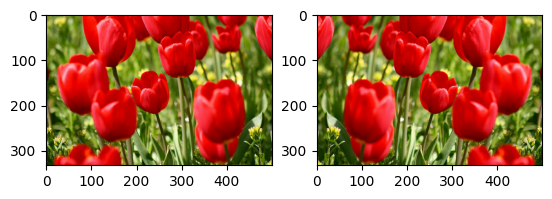

In [102]:
flipped=tf.image.flip_left_right(image)
visualize(image, flipped)